In [2]:
import sys

sys.path.append("../")

import behav_viz.ingest as ingest
import behav_viz.visualize as viz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from behav_viz.utils import plot_utils as pu
from behav_viz.visualize.df_preperation import *
sns.set_context("talk")


%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Stage Plots

In [4]:
animals = ["R042", "R043", "R045", "R048"]
multi_trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animals, date_min="2024-07-20"
)
multi_days_df = ingest.create_days_df.create_days_df_from_dj(
    animals, date_min="2024-07-20"
)

v1_animals = multi_trials_df[
    multi_trials_df["fix_experiment"] == "V1"
].animal_id.unique()
v2_animals = multi_trials_df[
    multi_trials_df["fix_experiment"] == "V2"
].animal_id.unique()

v1_trials = multi_trials_df.query("animal_id in @v1_animals").copy()
v2_trials = multi_trials_df.query("animal_id in @v2_animals").copy()
v1_days = multi_days_df.query("animal_id in @v1_animals").copy()
v2_days = multi_days_df.query("animal_id in @v2_animals").copy()

animal_id R042
Fetched 20 dates from Sessions table from 2024-07-20 to 2024-08-08 for R042

animal_id R043
Fetched 21 dates from Sessions table from 2024-07-20 to 2024-08-08 for R043

animal_id R045
Fetched 19 dates from Sessions table from 2024-07-20 to 2024-08-08 for R045

animal_id R048
Fetched 13 dates from Sessions table from 2024-07-27 to 2024-08-08 for R048



# Stage

## Days in Stage Box Plot

### Single Condition

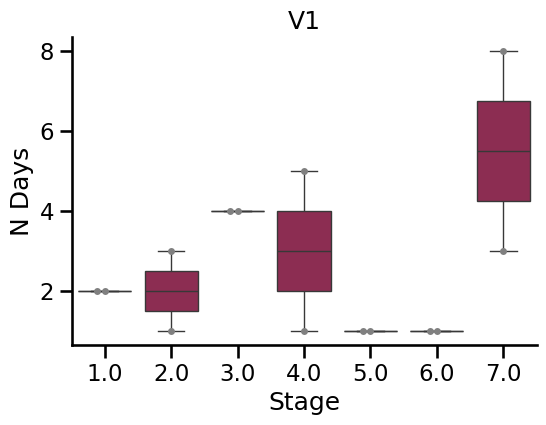

In [30]:
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_single_experiment(
    multi_trials_df, experiment="V1", title="V1"
)

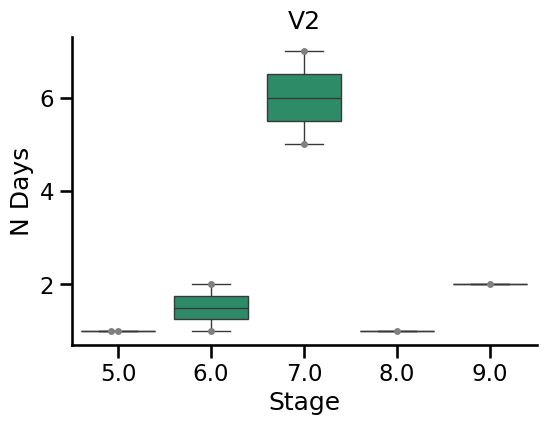

In [32]:
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_single_experiment(
    multi_trials_df, experiment="V2", title="V2", min_stage=5
)

### Comparing Conditions

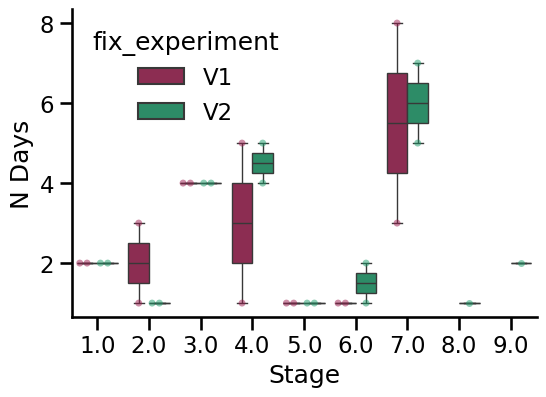

In [33]:
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_compare_experiment(
    multi_trials_df
)

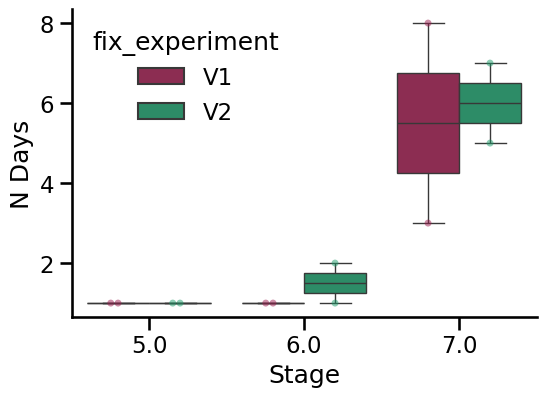

In [35]:
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_compare_experiment(
    multi_trials_df, min_stage=5, max_stage=7
)

## Stage over Days

### Single Condition

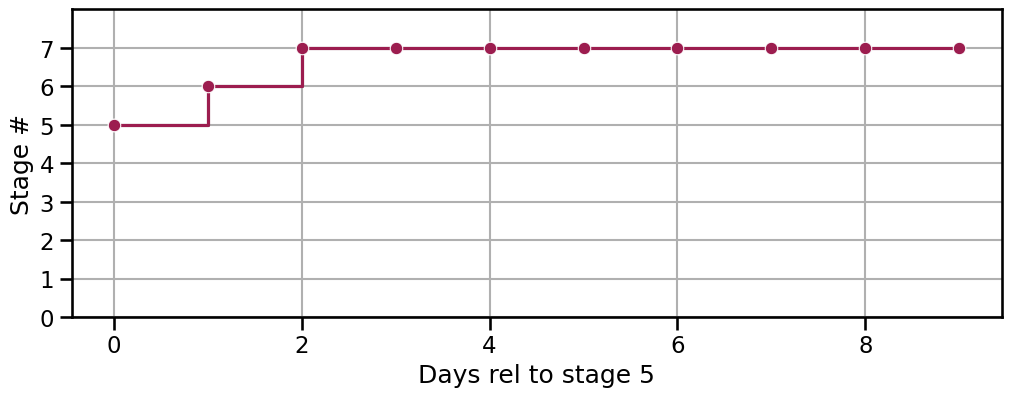

In [6]:
plot_df = multi_trials_df.query("stage >= 5").copy()
viz.FixationGrower.exp_compare_alpha.plot_ma_stage_single_experiment(
    plot_df, experiment="V1", relative_to_stage=5
)

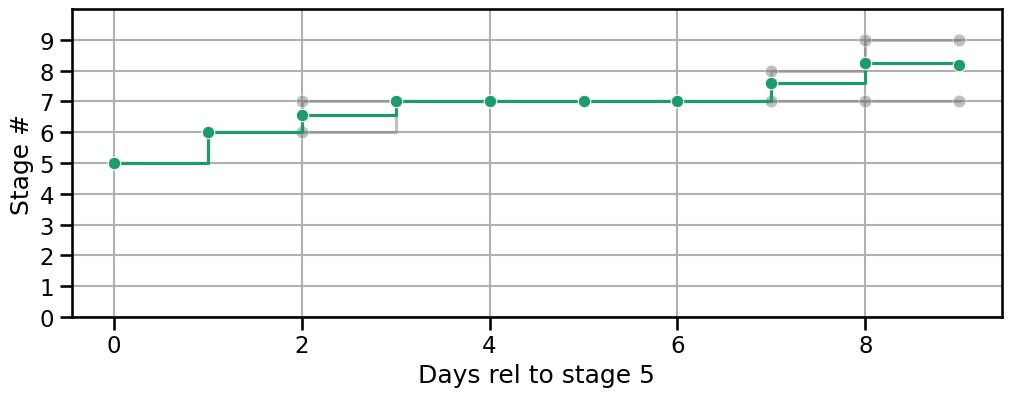

In [7]:
plot_df = multi_trials_df.query("stage >= 5").copy()
viz.FixationGrower.exp_compare_alpha.plot_ma_stage_single_experiment(
    plot_df, experiment="V2", relative_to_stage=5
)

### Comparing Conditions

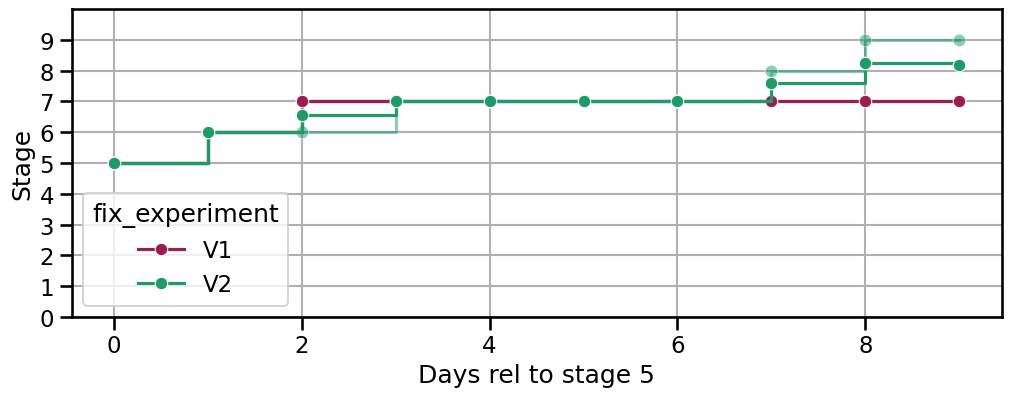

In [8]:
plot_df = multi_trials_df.query("stage >= 5").copy()
viz.FixationGrower.exp_compare_alpha.plot_ma_stage_compare_experiments(
    plot_df, relative_to_stage=5
)

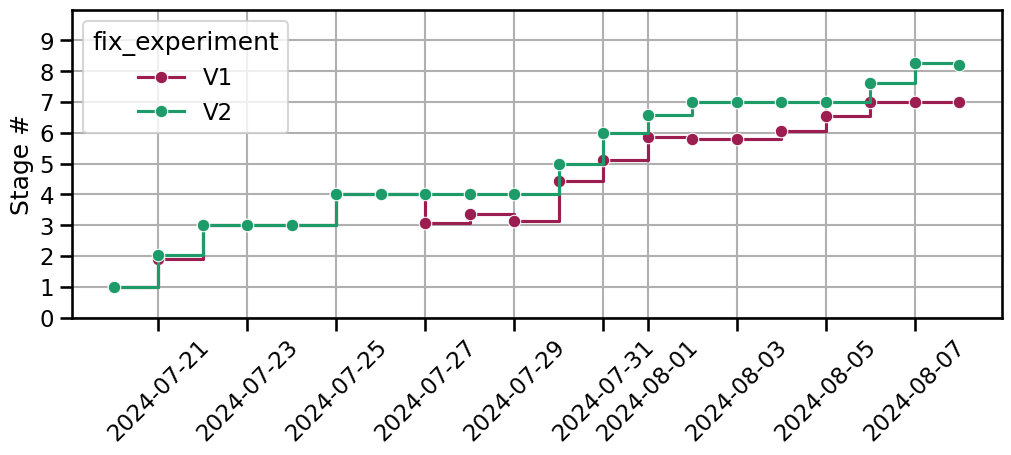

In [22]:
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiment(
    multi_trials_df, rotate_x_labels=True
)

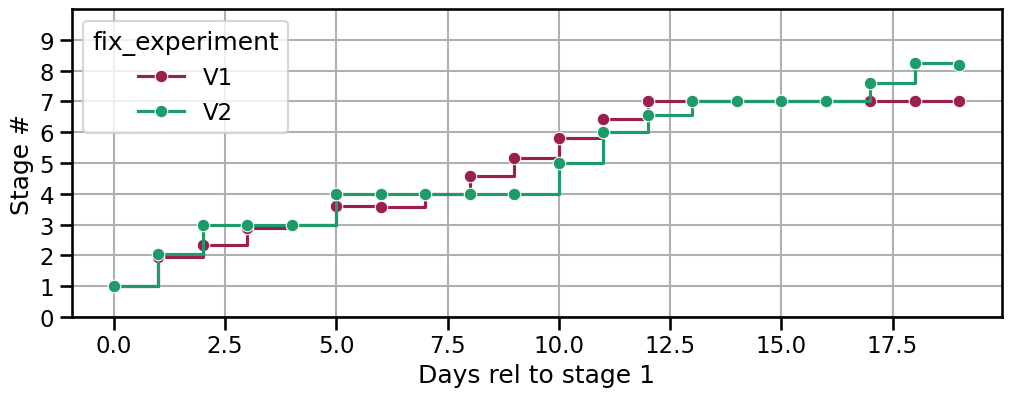

In [25]:
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiment(
    multi_trials_df, rotate_x_labels=False, relative_to_stage=1
)

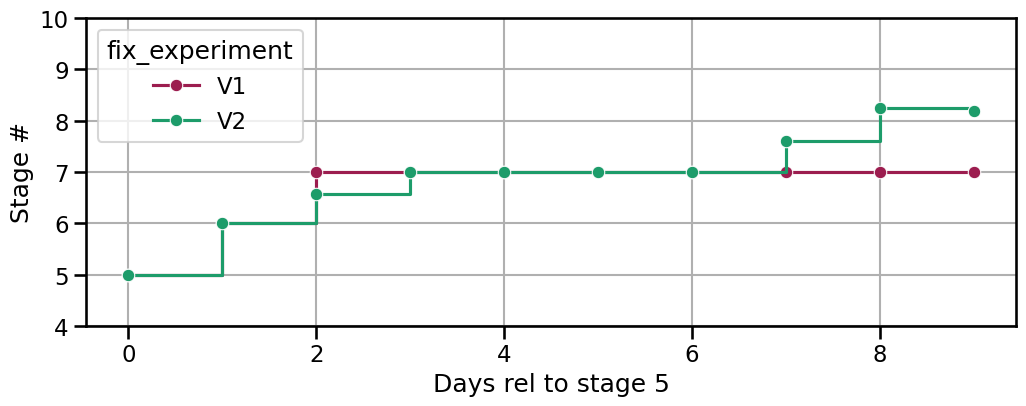

In [28]:
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiment(
    multi_trials_df.query("stage >=5").copy(),
    rotate_x_labels=False,
    relative_to_stage=5,
    ylim=(4, 10),
)